In [ ]:
#import all relevant libraries
import re
import math
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# def of all functions used in the below code

#Finds the length of the vector
def mod(Vector):
    squares = 0
    for i in range(len(Vector)):
        squares += (Vector[i])*(Vector[i])    
    Mod_value = (squares)**0.5
    return abs(Mod_value)


#Finds the Dot Product of two given Vectors in 3D
def Dot(Vector1,Vector2):
    Dot_product = 0
    for i in range(3):
        Dot_product += Vector1[i] * Vector2[i]
        
    return Dot_product


#Finds the Angle between given two vectors
def Angle_Btw(Vector1,Vector2):
    Angle_Btw = math.acos( Dot(Vector1,Vector2) / ( mod(Vector1) * mod(Vector2) ) )
    
    return Angle_Btw

#Finds the unit vector normal to the given two vector inputs
def NormalVec(Vector1,Vector2):
    normal = []
    Cross_Product = np.cross(Vector1,Vector2).tolist()
    
    Denominator =mod(Vector1) * mod(Vector2) * math.sin(Angle_Btw(Vector1,Vector2))
    
    for Dimensions in range(3):
        coordinate = Cross_Product[Dimensions]/ ( Denominator ) 
        normal.append(coordinate)
        
    return normal

#Given two coordinates, outputs a vector going from one to the other
def Vec(coord1,coord2):
    Vec = []
    for i in range(1,4):
        Vec.append(float(coord1[i]) - float(coord2[i]))
        
    return Vec

In [ ]:
#location of locally located PDB file
PDBfile = open("C:\\Users\\shree\\OneDrive\\Desktop\\ACADS\\Bio Simulations\\Final Report\\chmx_S631N.pdb")

In [ ]:
#Read appropriate lines required from the PDB files
Atoms = []
Atoms_nospaces = []
for lines in PDBfile.readlines():
    term = lines.strip()
    if term.startswith('ATOM'):
        Atoms.append(term) 
    elif term.startswith('TER'):
        break
        

# Filter Atom information
for elements in Atoms:
    elements = re.sub('\s+', ' ', elements).strip() #strips extra white spaces in a string
    SingleAtomDetail = []
    Mol = elements.split(" ")
    
    if Mol[2] in ['C','N', 'CA']:
        for number in [2,5,6,7]: #[Name, Xcoordinate, Ycoordinate, Zcoordinate]
            SingleAtomDetail.append(Mol[number])
        
        Atoms_nospaces.append(SingleAtomDetail)

#Sanity Check
for i in range(len(Atoms_nospaces)):
    print(Atoms_nospaces[i])

In [ ]:
#Inititalize the set for all Phi and Psi values
Phi_values = [] 
Psi_values = []

for start in range(len(Atoms_nospaces)-3):
    # Finding all Phi values
    if Atoms_nospaces[start][0] == 'C' and Atoms_nospaces[start+1][0] == 'N' and Atoms_nospaces[start+2][0] == 'CA' and Atoms_nospaces[start+3][0] == 'C':
        a = Vec(Atoms_nospaces[start],Atoms_nospaces[start+1])
        b = Vec(Atoms_nospaces[start+1],Atoms_nospaces[start+2])
        c = Vec(Atoms_nospaces[start+2],Atoms_nospaces[start+3])
        
        Normal_12 = NormalVec(a,b)
        Normal_23 = NormalVec(b,c)
        
        Cos_Phi = Dot(Normal_12, Normal_23)
        
        # Sign of the torsional angle is determined
        if Dot(a,(np.cross(b,c).tolist())) >= 0:
            Phi_values.append(-math.acos(Cos_Phi))
        else:
            Phi_values.append(math.acos(Cos_Phi))
        
        
    # Finding all Psi values
    elif Atoms_nospaces[start][0] == 'N' and Atoms_nospaces[start+1][0] == 'CA' and Atoms_nospaces[start+2][0] == 'C' and Atoms_nospaces[start+3][0] == 'N':
        vec1 = Vec(Atoms_nospaces[start],Atoms_nospaces[start+1])
        vec2 = Vec(Atoms_nospaces[start+1],Atoms_nospaces[start+2])
        vec3 = Vec(Atoms_nospaces[start+2],Atoms_nospaces[start+3])
        
        Normal_12 = NormalVec(vec1,vec2)
        Normal_23 = NormalVec(vec2,vec3)
        Cos_Psi = Dot(Normal_12, Normal_23)
        
        # Sign of the torsional angle is determined
        if Dot(vec1,(np.cross(vec2,vec3).tolist())) >= 0:
            Psi_values.append(-math.acos(Cos_Psi))
        else:
            Psi_values.append(math.acos(Cos_Psi))  
        

In [ ]:
#The first residue will not have a Phi value and the last residue will not have a complimentary Psi value
Phi_values =  [None] + Phi_values
Psi_values = Psi_values + [None]

In [ ]:
#Plot the Ramachandran Plot for 1CCV
plt.figure(figsize=(5,5),dpi=200)
plt.scatter(Phi_values,Psi_values, marker='+',alpha=1);
plt.xlabel("φ (rad)")
plt.ylabel("ψ (rad)")
plt.title("Ramachandran Plot - chmx_wt")
plt.axhline(0,ls="-",c="black",lw=0.5);
plt.axvline(0,ls="-",c="black",lw=0.5);

# The plot was compared with an Online Calculator

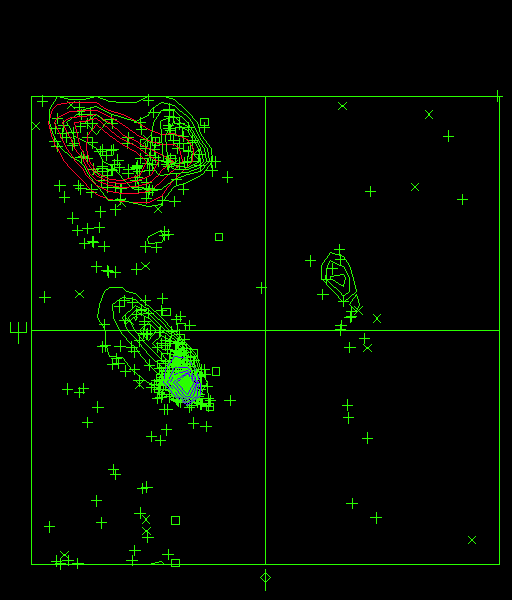